In [18]:
import skfuzzy as fuzz
import matplotlib.pyplot as plt

import sys
sys.path.append('/Users/polinaturishcheva/Desktop/cluster_vs_continuum/src/')
from corc.generation import GenerationModel
from sklearn.metrics import adjusted_rand_score

%matplotlib inline

In [20]:
from tqdm import tqdm
import numpy as np
import pandas as pd

In [100]:
params = {
    'center_structure': 'equidistant_triangle',
    'n_centers': 3,
    'distance': 1,
    'n_samples': 1000,
    'dim': 2,
    'save_file': False,
    'outdir': '.'
}

In [101]:
gen = GenerationModel(**params)
gen.generate()
clusters = list(range(2, 20)) + list(range(20, 60, 10))

In [102]:
fpcs = {}
data_dict = {}
labels = {}
labels_pred = {}
predicted_centers = {}

for std in tqdm([0.01, 0.1, 0.2, 0.5]):
    fpcs[std] = {}
    data_dict[std] = {}
    labels[std] = {}
    labels_pred[std] = {}
    predicted_centers[std] = {}
    for c in clusters:
        fpcs[std][c] = []
        data_dict[std][c] = []
        labels[std][c] = []
        labels_pred[std][c] = []
        predicted_centers[std][c] = []
        for _ in range(10):
            data = gen.sample_embedding(std=std)
            data_dict[std][c].append(data)
            labels[std][c].append(gen.labels)
            cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
                data.T, c, 2, error=0.005, maxiter=1000, init=None)
            fpcs[std][c].append(fpc)
            labels_pred[std][c].append(np.argmax(u, axis=0))
            predicted_centers[std][c].append(cntr)
        
        

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:48<00:00, 12.23s/it]


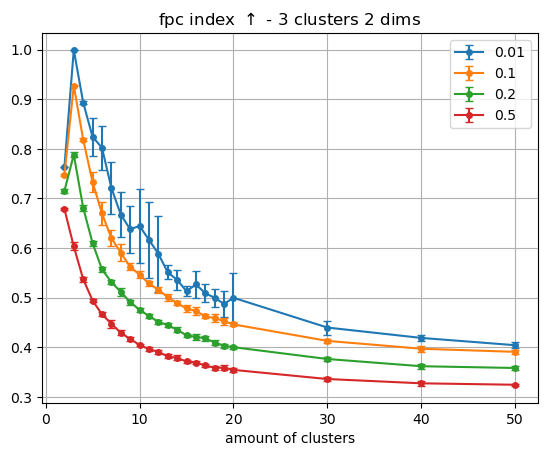

In [103]:
x = clusters 
for std in [0.01, 0.1, 0.2, 0.5]:
    y = [np.mean(fpcs[std][c]) for c in clusters]
    errors = [np.sqrt(np.var(fpcs[std][c])) for c in clusters]
    plt.errorbar(x, y, yerr=errors, fmt='o-', label=str(std), markersize=4, capsize=3)
plt.grid()
plt.xlabel('amount of clusters')
plt.title(r'fpc index $\uparrow$ - 3 clusters 2 dims')
plt.legend()

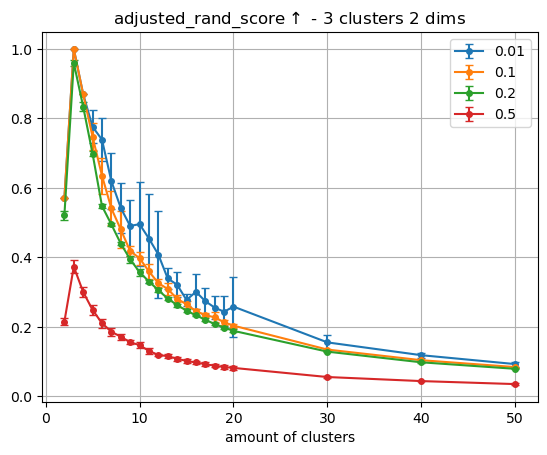

In [104]:
x = clusters 
for std in [0.01, 0.1, 0.2, 0.5]:
    y_raw_arr = []
    for c in clusters:
        y_raw = [adjusted_rand_score(labels[std][c][i].flatten(), labels_pred[std][c][i]) for i in range(10)]
        y_raw_arr.append(y_raw)
    y = [np.mean(y_raw_arr[c]) for c in range(len(clusters)) ]
    errors = [np.sqrt(np.var(y_raw_arr[c])) for c in range(len(clusters))]
    plt.errorbar(x, y, yerr=errors, fmt='o-', label=str(std), markersize=4, capsize=3)
plt.grid()
plt.xlabel('amount of clusters')
plt.title(r'adjusted_rand_score$\uparrow$ - 3 clusters 2 dims')
plt.legend()

## 7 clusters 

In [83]:
params = {
    'center_structure': 'uniform',
    'n_centers': 7,
    'distance': 1,
    'n_samples': 1000,
    'dim': 2,
    'save_file': False,
    'outdir': '.'
}
gen = GenerationModel(**params)
gen.generate()

In [89]:
fpcs = {}
data_dict = {}
labels = {}
labels_pred = {}
predicted_centers = {}

for std in tqdm([0.01, 0.1, 0.2, 0.5]):
    fpcs[std] = {}
    data_dict[std] = {}
    labels[std] = {}
    labels_pred[std] = {}
    predicted_centers[std] = {}
    for c in clusters:
        fpcs[std][c] = []
        data_dict[std][c] = []
        labels[std][c] = []
        labels_pred[std][c] = []
        predicted_centers[std][c] = []
        for _ in range(10):
            data = gen.sample_embedding(std=std)
            data_dict[std][c].append(data)
            labels[std][c].append(gen.labels)
            cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
                data.T, c, 2, error=0.005, maxiter=1000, init=None)
            fpcs[std][c].append(fpc)
            labels_pred[std][c].append(np.argmax(u, axis=0))
            predicted_centers[std][c].append(cntr)
        
        

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:47<00:00, 11.90s/it]


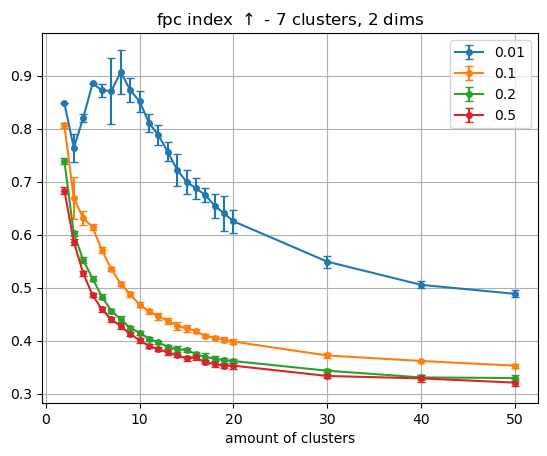

In [90]:
x = clusters 
for std in [0.01, 0.1, 0.2, 0.5]:
    y = [np.mean(fpcs[std][c]) for c in clusters]
    errors = [np.sqrt(np.var(fpcs[std][c])) for c in clusters]
    plt.errorbar(x, y, yerr=errors, fmt='o-', label=str(std), markersize=4, capsize=3)
plt.grid()
plt.xlabel('amount of clusters')
plt.title(r'fpc index $\uparrow$ - 7 clusters, 2 dims')
plt.legend()

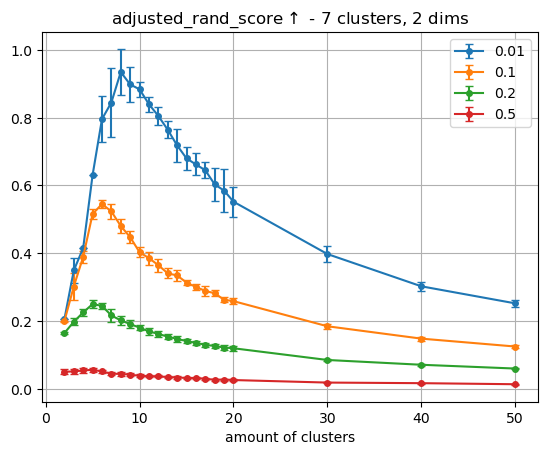

In [91]:
x = clusters 
for std in [0.01, 0.1, 0.2, 0.5]:
    y_raw_arr = []
    for c in clusters:
        y_raw = [adjusted_rand_score(labels[std][c][i].flatten(), labels_pred[std][c][i]) for i in range(10)]
        y_raw_arr.append(y_raw)
    y = [np.mean(y_raw_arr[c]) for c in range(len(clusters)) ]
    errors = [np.sqrt(np.var(y_raw_arr[c])) for c in range(len(clusters))]
    plt.errorbar(x, y, yerr=errors, fmt='o-', label=str(std), markersize=4, capsize=3)
plt.grid()
plt.xlabel('amount of clusters')
plt.title(r'adjusted_rand_score$\uparrow$ - 7 clusters, 2 dims')
plt.legend()

## 3 clusters, 32 dims

In [92]:
params = {
    'center_structure': 'uniform',
    'n_centers': 3,
    'distance': 1,
    'n_samples': 1000,
    'dim': 32,
    'save_file': False,
    'outdir': '.'
}
gen = GenerationModel(**params)
gen.generate()

In [93]:
fpcs = {}
data_dict = {}
labels = {}
labels_pred = {}
predicted_centers = {}

for std in tqdm([0.01, 0.1, 0.2, 0.5]):
    fpcs[std] = {}
    data_dict[std] = {}
    labels[std] = {}
    labels_pred[std] = {}
    predicted_centers[std] = {}
    for c in clusters:
        fpcs[std][c] = []
        data_dict[std][c] = []
        labels[std][c] = []
        labels_pred[std][c] = []
        predicted_centers[std][c] = []
        for _ in range(10):
            data = gen.sample_embedding(std=std)
            data_dict[std][c].append(data)
            labels[std][c].append(gen.labels)
            cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
                data.T, c, 2, error=0.005, maxiter=1000, init=None)
            fpcs[std][c].append(fpc)
            labels_pred[std][c].append(np.argmax(u, axis=0))
            predicted_centers[std][c].append(cntr)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:15<00:00,  3.76s/it]


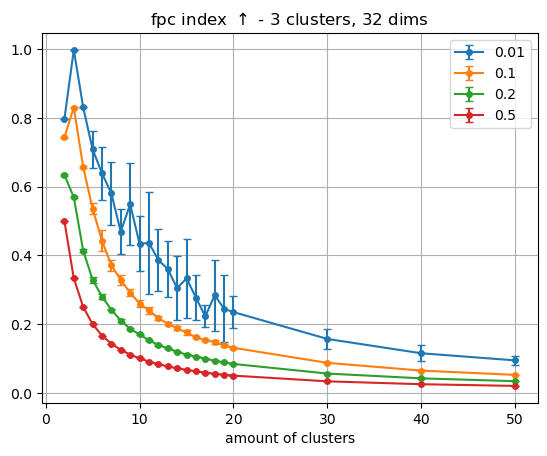

In [94]:
x = clusters 
for std in [0.01, 0.1, 0.2, 0.5]:
    y = [np.mean(fpcs[std][c]) for c in clusters]
    errors = [np.sqrt(np.var(fpcs[std][c])) for c in clusters]
    plt.errorbar(x, y, yerr=errors, fmt='o-', label=str(std), markersize=4, capsize=3)
plt.grid()
plt.xlabel('amount of clusters')
plt.title(r'fpc index $\uparrow$ - 3 clusters, 32 dims')
plt.legend()

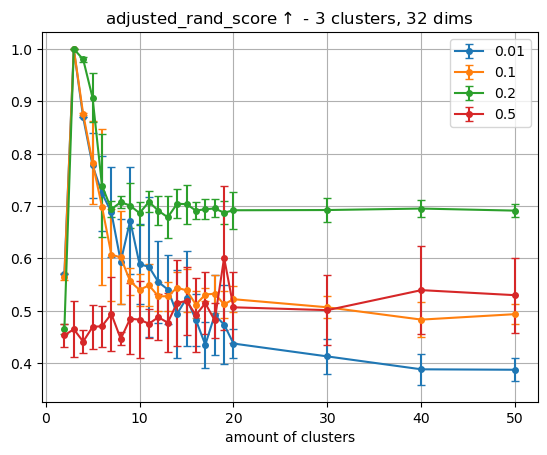

In [95]:
x = clusters 
for std in [0.01, 0.1, 0.2, 0.5]:
    y_raw_arr = []
    for c in clusters:
        y_raw = [adjusted_rand_score(labels[std][c][i].flatten(), labels_pred[std][c][i]) for i in range(10)]
        y_raw_arr.append(y_raw)
    y = [np.mean(y_raw_arr[c]) for c in range(len(clusters)) ]
    errors = [np.sqrt(np.var(y_raw_arr[c])) for c in range(len(clusters))]
    plt.errorbar(x, y, yerr=errors, fmt='o-', label=str(std), markersize=4, capsize=3)
plt.grid()
plt.xlabel('amount of clusters')
plt.title(r'adjusted_rand_score$\uparrow$ - 3 clusters, 32 dims')
plt.legend()

## 7 clusters, 32 dims

In [96]:
params = {
    'center_structure': 'uniform',
    'n_centers': 7,
    'distance': 1,
    'n_samples': 1000,
    'dim': 32,
    'save_file': False,
    'outdir': '.'
}
gen = GenerationModel(**params)
gen.generate()

In [97]:
fpcs = {}
data_dict = {}
labels = {}
labels_pred = {}
predicted_centers = {}

for std in tqdm([0.01, 0.1, 0.2, 0.5]):
    fpcs[std] = {}
    data_dict[std] = {}
    labels[std] = {}
    labels_pred[std] = {}
    predicted_centers[std] = {}
    for c in clusters:
        fpcs[std][c] = []
        data_dict[std][c] = []
        labels[std][c] = []
        labels_pred[std][c] = []
        predicted_centers[std][c] = []
        for _ in range(10):
            data = gen.sample_embedding(std=std)
            data_dict[std][c].append(data)
            labels[std][c].append(gen.labels)
            cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
                data.T, c, 2, error=0.005, maxiter=1000, init=None)
            fpcs[std][c].append(fpc)
            labels_pred[std][c].append(np.argmax(u, axis=0))
            predicted_centers[std][c].append(cntr)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:18<00:00,  4.64s/it]


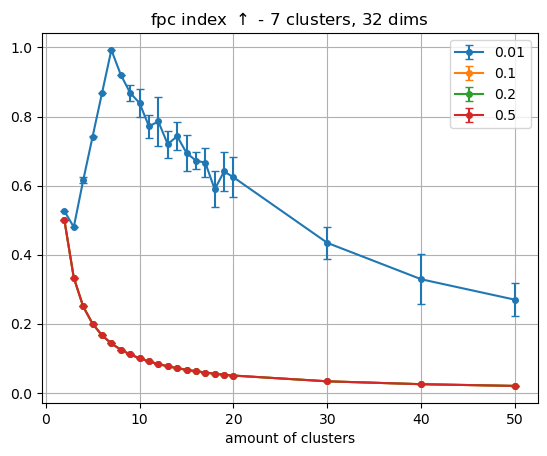

In [98]:
x = clusters 
for std in [0.01, 0.1, 0.2, 0.5]:
    y = [np.mean(fpcs[std][c]) for c in clusters]
    errors = [np.sqrt(np.var(fpcs[std][c])) for c in clusters]
    plt.errorbar(x, y, yerr=errors, fmt='o-', label=str(std), markersize=4, capsize=3)
plt.grid()
plt.xlabel('amount of clusters')
plt.title(r'fpc index $\uparrow$ - 7 clusters, 32 dims')
plt.legend()

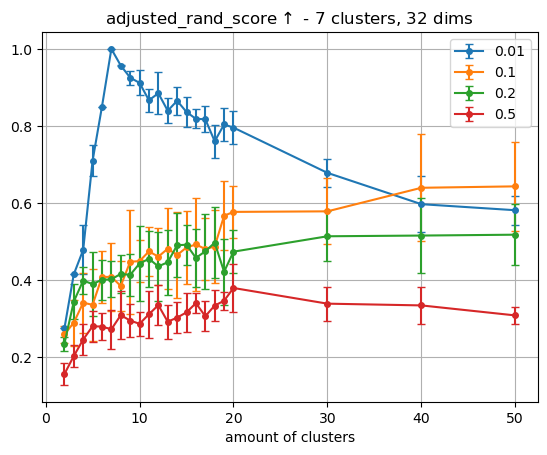

In [99]:
x = clusters 
for std in [0.01, 0.1, 0.2, 0.5]:
    y_raw_arr = []
    for c in clusters:
        y_raw = [adjusted_rand_score(labels[std][c][i].flatten(), labels_pred[std][c][i]) for i in range(10)]
        y_raw_arr.append(y_raw)
    y = [np.mean(y_raw_arr[c]) for c in range(len(clusters)) ]
    errors = [np.sqrt(np.var(y_raw_arr[c])) for c in range(len(clusters))]
    plt.errorbar(x, y, yerr=errors, fmt='o-', label=str(std), markersize=4, capsize=3)
plt.grid()
plt.xlabel('amount of clusters')
plt.title(r'adjusted_rand_score$\uparrow$ - 7 clusters, 32 dims')
plt.legend()